In [1]:
import torch 
import torch.nn as nn
import matplotlib.pylab as plt
import numpy as np
import os
import cv2
import random
import pickle

In [2]:
#Creating the dataset
DATADIR = "C:\\Users\\Farhan\\Pictures\\Images 2"
CATEGORIES = ['RBC', 'WBC']
IMAGE_SIZE = 32
data = []

class my_set():
        def create_train():
                for category in CATEGORIES:
                    path = os.path.join(DATADIR, category)  
                    class_num = CATEGORIES.index(category)
                    for img in os.listdir(path):
                        try:
                          img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                          new_array = cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))
                          data.append([new_array, class_num])
                        except:
                            pass
        
        create_train()
        random.shuffle(data)
        
        x = []
        y = []
        
        for features, label in data:
            x.append(features)
            y.append(label)
        
        x = np.array(x).reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
        
        pickle_out = open("x.pickle", "wb")
        pickle.dump(x, pickle_out)
        pickle_out.close()
        
        pickle_out = open("y.pickle", "wb")
        pickle.dump(y, pickle_out)
        pickle_out.close()

print("Length of dataset:", len(data))

Length of dataset: 2336


In [3]:
#Function to plot the image and model class (CNN)
def show_data(data_sample):
    plt.imshow(data_sample[0].reshape(32, 32), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))
    
    
class CNN(nn.Module):
    
    # Contructor
    def __init__(self, out_1=32, out_2=64):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, stride=1)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 5 * 5, 2)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x
    


In [4]:
#Creating model instance and other parameters for training
model = CNN()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.00001
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay=1e-5)
train_set, val_set =  torch.utils.data.random_split(data, [1500, 836])
train_loader = torch.utils.data.DataLoader(dataset = train_set, batch_size = 100)
validation_loader = torch.utils.data.DataLoader(dataset = val_set, batch_size=1)
n_epochs = 5
cost_list = []
accuracy_list = []
N_test = len(val_set)
COST = 0
print("Length of training set: ", len(train_set))
print("Length of validation set: ", len(val_set))

Length of training set:  1500
Length of validation set:  836


C:\Users\Farhan\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Validation Accuracy:  97.1291866028708 %


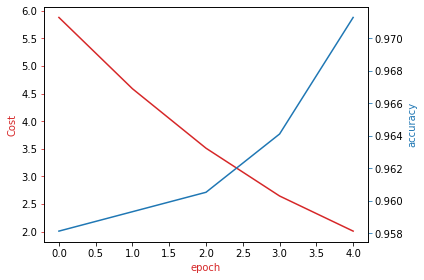

In [5]:
#Training function 
def train_model(n_epochs):
    for epoch in range(n_epochs):
        COST=0
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x.unsqueeze(dim=1).float())
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            COST+=loss.data
        
        cost_list.append(COST)
        correct=0
        #perform a prediction on the validation  data  
        for x_test, y_test in validation_loader:
            z = model(x_test.unsqueeze(dim=1).float())
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        accuracy_list.append(accuracy)
        
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(cost_list, color=color)
    ax1.set_xlabel('epoch', color=color)
    ax1.set_ylabel('Cost', color=color)
    ax1.tick_params(axis='y', color=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color) 
    ax2.set_xlabel('epoch', color=color)
    ax2.plot(accuracy_list, color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()
     
    print("Validation Accuracy: ", accuracy*100, "%")

train_model(n_epochs)

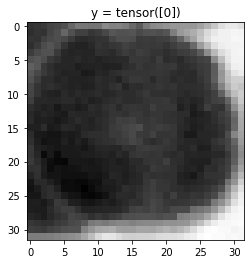

yhat: tensor([0])


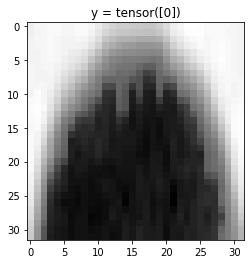

yhat: tensor([0])


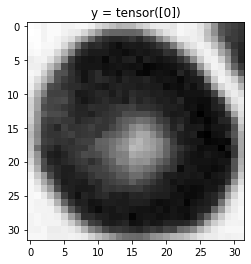

yhat: tensor([0])


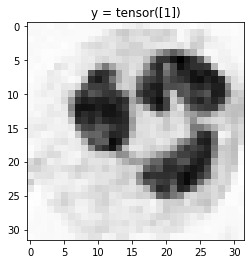

yhat: tensor([1])


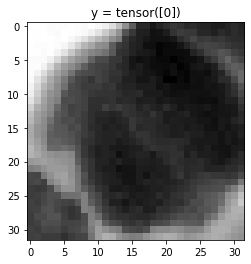

yhat: tensor([0])


In [6]:
#Plotting sample pictures with the outputs
correct=0
count=0
for x_test, y_test in validation_loader:
            z = model(x_test.unsqueeze(dim=1).float())
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
            if count < 5:
                show_data((x_test, y_test))
                plt.show()
                print("yhat:", yhat)
                count+=1